# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study


There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

# Understanding and hypothesis


Which lead can be converted by assigning the lead score.
Taking prior  assuptionIf lead score below 50 then chances of converting are less and 
if more than 50 score then chances of getting converted will be higher. We will be changing it if needed.

In [7773]:
# importing required libraries

In [7774]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

import datetime as dt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


import statsmodels.api as sm

# Reading and Understanding data

In [7775]:
leads_df = pd.read_csv("Leads.csv", sep=",", encoding="ISO-8859-1", header=0)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7776]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7777]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7778]:
leads_df.shape

(9240, 37)

# Data Preparation

In [7779]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7780]:
leads_df.isnull().sum()/len(leads_df.index) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7781]:
# Will drop columns having more than 45 percentage of null values,i.e. Lead Quality, Asymmetrique Activity Index,Asymmetrique Profile Index,
# Asymmetrique Activity Score and Asymmetrique Profile Score

In [7782]:
leads_df_drp = leads_df.drop( columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [7783]:
leads_df_drp.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [7784]:
leads_df_drp.isnull().sum()/len(leads_df.index) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7785]:
# Checking for duplicate lead number

sum(leads_df_drp.duplicated(subset=['Lead Number'])) == 0

True

__Number of duplicate value of lead number is 0. so each row is different lead__

In [7786]:
columns = leads_df_drp.columns

for col in columns:
    print("Column " + col + " displaying value counts \n")
    print(leads_df_drp[col].value_counts())
    print("\n\n =====================================================")

Column Prospect ID displaying value counts 

3547a5aa-61bb-4008-b29d-cbd7a5b747e1    1
8247051c-f838-4a41-b39c-1f0b44c3d5e6    1
e7196e38-5d81-4e4d-8eb1-53a4922bf1ea    1
c36cf66e-4b61-4671-b41f-9c7d0fb32b4b    1
eecf05f5-467a-48e6-ba25-eeded2e2ec59    1
                                       ..
ce2c9744-30c8-48b9-9718-1abc736f7007    1
56154cd7-5218-4f01-bbbd-862fd10ab3c3    1
7f808326-0e7e-437d-92eb-1a45de743749    1
9dd206e6-411d-4bc6-a949-5b50181e9976    1
ae6e6859-c8a9-4b3e-8172-a92a89147740    1
Name: Prospect ID, Length: 9240, dtype: int64


Column Lead Number displaying value counts 

608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64


Column Lead Origin displaying value counts 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Orig

The value counts for the columns show that it has many values as select which needs to be handled also mentioned in problem statement. As these values indicates nothing selected and equivalent to null only.So will replace these values by null and will impute later if needed.

In [7787]:
# replacing the select values by np.nan for all the columns where select value is present
for col in columns:
    leads_df_drp[col] = np.where((leads_df_drp[col]== 'Select'),np.nan,leads_df_drp[col] )

In [7788]:
# verifying the replacement

for col in columns:
    print("column :" + col + "\n")
    isContains = 'Select' in leads_df_drp[col].values
    if(isContains):
        print("Coulmn " + col + "contains Select value \n")
        print(leads_df_drp[col].value_counts()['Select'])
    print("\n\n")

column :Prospect ID




column :Lead Number




column :Lead Origin




column :Lead Source




column :Do Not Email




column :Do Not Call




column :Converted




column :TotalVisits




column :Total Time Spent on Website




column :Page Views Per Visit




column :Last Activity




column :Country




column :Specialization




column :How did you hear about X Education




column :What is your current occupation




column :What matters most to you in choosing a course




column :Search




column :Magazine




column :Newspaper Article




column :X Education Forums




column :Newspaper




column :Digital Advertisement




column :Through Recommendations




column :Receive More Updates About Our Courses




column :Tags




column :Update me on Supply Chain Content




column :Get updates on DM Content




column :Lead Profile




column :City




column :I agree to pay the amount through cheque




column :A free copy of Mastering The Interview




column :Last Notable Ac

In [7789]:
leads_df_drp.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7790]:
# after replacing select with null again verifying the missing values of columns. If percentage of null value is high will drop the column.
leads_df_drp.isnull().sum()/len(leads_df.index) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7791]:
# dropping below columns having more than 45 percentage of null values
leads_df_drp = leads_df_drp.drop( columns=['How did you hear about X Education','Lead Profile'])

Let's analyse all the variables first to see, if any data preprocessing is required.

In [7792]:
# to check the unique values in columns of dataframe to analyse the each column 
leads_df_drp.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

As we can see from the above unique values, all the colummns except Prospect ID,Lead Number seems to be categorical column.
Let's analyse column one by one.

In [7793]:
leads_df_drp['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [7794]:
leads_df_drp['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
testone                 1
NC_EDM                  1
youtubechannel          1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

As we can see above multiple entry for Google, Social media. We need to combine those to get the correct data count.

In [7795]:
def mapValueTo(x):
    return x.map({'google': 'Google', 'Facebook': 'Social Media',np.nan:'Unknown' })
    #leads_df_drp[col] = leads_df_drp[col].apply(lambda x : newValue if x == oldValue else x)
    #print("called :" + col + " : " + oldValue + ": " + newValue)
    

#leads_df_drp['Lead Source'] = leads_df_drp['Lead Source'].apply(lambda x : 'Google' if x == 'google')

In [7796]:
#leads_df_drp['Lead Source'] = leads_df_drp['Lead Source'].apply(mapValueTo('Lead Source',np.nan,'Unknown'))
#leads_df_drp['Lead Source'] = leads_df_drp['Lead Source'].apply(mapValueTo('Lead Source','google','Google'))
#leads_df_drp['Lead Source'] = leads_df_drp['Lead Source'].apply(mapValueTo('Lead Source','Facebook','Social Media'))

In [7797]:
#leads_df_drp['Lead Source'] = leads_df_drp[['Lead Source']].apply(mapValueTo)
#leads_df_drp['Lead Source'].value_counts(dropna=False)

In [7798]:
# leads_df_drp['Lead Source Modified'] = leads_df_drp['Lead Source'] 

leads_df_drp['Lead Source'] = np.where((leads_df_drp['Lead Source']== np.nan),'Lead Source_Additional',leads_df_drp['Lead Source'] )
leads_df_drp['Lead Source'] = np.where((leads_df_drp['Lead Source']== 'google'),'Google',leads_df_drp['Lead Source'] )
leads_df_drp['Lead Source'] = np.where((leads_df_drp['Lead Source']== 'Facebook'),'Social Media',leads_df_drp['Lead Source'] )

leads_df_drp['Lead Source'].value_counts(dropna=False)

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           57
NaN                    36
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [7799]:
leads_df_drp['Lead Source'] =leads_df_drp['Lead Source'].replace(np.nan,'Lead Source_Additional')
leads_df_drp['Lead Source'].value_counts()

Google                    2873
Direct Traffic            2543
Olark Chat                1755
Organic Search            1154
Reference                  534
Welingak Website           142
Referral Sites             125
Social Media                57
Lead Source_Additional      36
bing                         6
Click2call                   4
Live Chat                    2
Press_Release                2
welearnblog_Home             1
testone                      1
NC_EDM                       1
blog                         1
youtubechannel               1
Pay per Click Ads            1
WeLearn                      1
Name: Lead Source, dtype: int64

In [7800]:
leads_df_drp['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [7801]:
leads_df_drp['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

As 'Do Not Call' variable indicates data imbalance as having only one type of data. 
We would not be considering this column to make decision, so we can drop it.

In [7802]:
# List of columns to be dropped

column_to_be_dropped = ['Do Not Call']

In [7803]:
leads_df_drp['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [7804]:
leads_df_drp['Total Time Spent on Website'].value_counts()  # this column does not have any null value

0.0       2193
60.0        19
127.0       18
74.0        18
75.0        18
          ... 
1658.0       1
1091.0       1
1433.0       1
1153.0       1
2207.0       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [7805]:
leads_df_drp['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [7806]:
leads_df_drp['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Let's replace the null values with Additional_LastActivity 
and rest of low occurence values which are below 100 will combine them into one

In [7807]:
#leads_df_drp['Last Activity'] = leads_df_drp['Last Activity'].replace(np.nan,'Unspecified')
leads_df_drp['Last Activity'] = leads_df_drp['Last Activity'].replace(np.nan,'Additional_LastActivity')
leads_df_drp['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Additional_LastActivity          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [7808]:
leads_df_drp['Last Activity'] = np.where(leads_df_drp['Last Activity'].isin([
    'Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked'
    ,'Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails'
    ]), 'Additional_LastActivity',leads_df_drp['Last Activity'])

In [7809]:
leads_df_drp['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Additional_LastActivity       308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [7810]:
leads_df_drp['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Sweden                     3
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
Philippines                2
Netherlands                2
Italy                      2
Ghana                      2
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Switzerland                1
Vietnam                    1
Liberia       

Since their are too many missing values. Will impute the value with mode value. 
As India is most occuring country, will impute with India.


In [7811]:
leads_df_drp['Country'] = leads_df_drp['Country'].replace(np.nan,'India')
leads_df_drp['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Bangladesh                 2
Philippines                2
Italy                      2
Ghana                      2
China                      2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Belgium                    2
Vietnam                    1
Russia                     1
Denmark                    1
Sri Lanka                  1
Indonesia                  1
Malaysia                   1
Kenya         

__As the value of India is too high, almost entire data have same country. we can add  this colummn in to be dropped.__

In [7812]:
leads_df_drp['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Seems the Specialization having many Null values which are not provided by the leads. Let's impute with Unspecified

In [7813]:
leads_df_drp['Specialization'] = leads_df_drp['Specialization'].replace(np.nan, 'Unspecified')

In [7814]:
leads_df_drp['Specialization'].value_counts(dropna=False)

Unspecified                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [7815]:
leads_df_drp['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We will impute the null values with mode value ie. Unemployed

In [7816]:
leads_df_drp['What is your current occupation'] = np.where((leads_df_drp['What is your current occupation'].isin([np.nan])),'Unemployed',leads_df_drp['What is your current occupation'])

leads_df_drp['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [7817]:
leads_df_drp['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We will impute the null values with mode value ie. Better Career Prospects

In [7818]:
leads_df_drp['What matters most to you in choosing a course'] = np.where((leads_df_drp['What matters most to you in choosing a course'].isin([np.nan])),'Better Career Prospects',leads_df_drp['What matters most to you in choosing a course'])

leads_df_drp['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

As we can see from the above values, it seems there is data imbalance for this column as most of values are Better Career Prospects for this column.
So, we can consider the column to be dropped. Hence will append in list of column_to_be_dropped.

In [7819]:
column_to_be_dropped.append('What matters most to you in choosing a course')
column_to_be_dropped

['Do Not Call', 'What matters most to you in choosing a course']

In [7820]:
leads_df_drp['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [7821]:
#Adding column Search to imbalance column list to be dropped
column_to_be_dropped.append('Search')

In [7822]:
leads_df_drp['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [7823]:
#Adding column Magazine to imbalance column list to be dropped
column_to_be_dropped.append('Magazine')

In [7824]:
leads_df_drp['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [7825]:
#Adding column Newspaper Article to imbalance column list to be dropped
column_to_be_dropped.append('Newspaper Article')

In [7826]:
leads_df_drp['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [7827]:
#Adding column X Education Forums to imbalance column list to be dropped
column_to_be_dropped.append('X Education Forums')

In [7828]:
leads_df_drp['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [7829]:
#Adding column Newspaper to imbalance column list to be dropped
column_to_be_dropped.append('Newspaper')

In [7830]:
leads_df_drp['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [7831]:
#Adding column Digital Advertisement to imbalance column list to be dropped
column_to_be_dropped.append('Digital Advertisement')

In [7832]:
leads_df_drp['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [7833]:
#Adding column Through Recommendations to imbalance column list to be dropped
column_to_be_dropped.append('Through Recommendations')

In [7834]:
leads_df_drp['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [7835]:
#Adding column Newspaper to imbalance column list to be dropped
column_to_be_dropped.append('Receive More Updates About Our Courses')

In [7836]:
leads_df_drp['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [7837]:
# imputing the null values with Unspecified value
leads_df_drp['Tags'] = np.where((leads_df_drp['Tags'].isin([np.nan])),'Unspecified',leads_df_drp['Tags'])

leads_df_drp['Tags'].value_counts(dropna=False)

Unspecified                                          3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [7838]:
leads_df_drp['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [7839]:
#Adding column 'Update me on Supply Chain Content to imbalance column list to be dropped
column_to_be_dropped.append('Update me on Supply Chain Content')

In [7840]:
leads_df_drp['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [7841]:
#Adding column 'Get updates on DM Content' to imbalance column list to be dropped
column_to_be_dropped.append('Get updates on DM Content')

In [7842]:
leads_df_drp['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [7843]:
leads_df_drp['City'].mode()

0    Mumbai
dtype: object

In [7844]:
# will impute with mode Mumbai for null values
#leads_df_drp['City'] = np.where((leads_df_drp['City'].isin([np.nan])),'Unspecified',leads_df_drp['City'])
leads_df_drp['City'] = np.where((leads_df_drp['City'].isin([np.nan])),'Mumbai',leads_df_drp['City'])

leads_df_drp['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [7845]:
leads_df_drp['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [7846]:
#Adding column I agree to pay the amount through cheque to imbalance column list to be dropped
column_to_be_dropped.append('I agree to pay the amount through cheque')

In [7847]:
leads_df_drp['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [7848]:
leads_df_drp['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [7849]:
#  We can merge the low occuring Last Notable Activity into one
leads_df_drp['Last Notable Activity'] = np.where((leads_df_drp['Last Notable Activity']
                                                  .isin(['Had a Phone Conversation','Email Marked Spam','Form Submitted on Website','View in browser link Clicked','Approached upfront','Resubscribed to emails','Email Received'])),'Additional_LastNotableActivity',leads_df_drp['Last Notable Activity'])

leads_df_drp['Last Notable Activity'].value_counts(dropna=False)

Modified                          3407
Email Opened                      2827
SMS Sent                          2172
Page Visited on Website            318
Olark Chat Conversation            183
Email Link Clicked                 173
Email Bounced                       60
Unsubscribed                        47
Unreachable                         32
Additional_LastNotableActivity      21
Name: Last Notable Activity, dtype: int64

# EDA

__Visualization of variable using plots__

Univariant Analysis - Lead Origin 

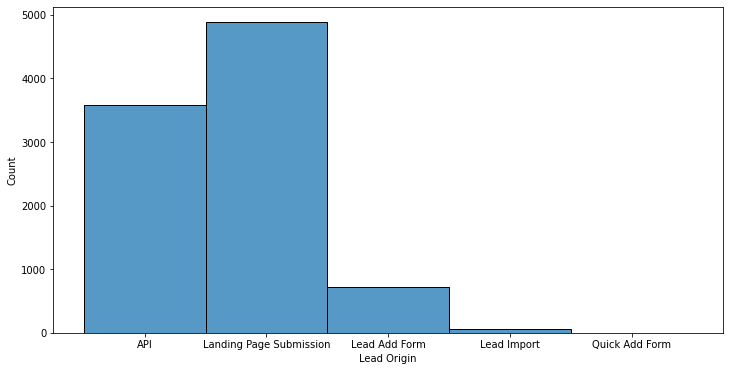

In [7850]:
plt.figure(figsize=(12,6))
sns.histplot(leads_df_drp['Lead Origin'])
plt.show()

Bivariant Analysis - Lead Origin

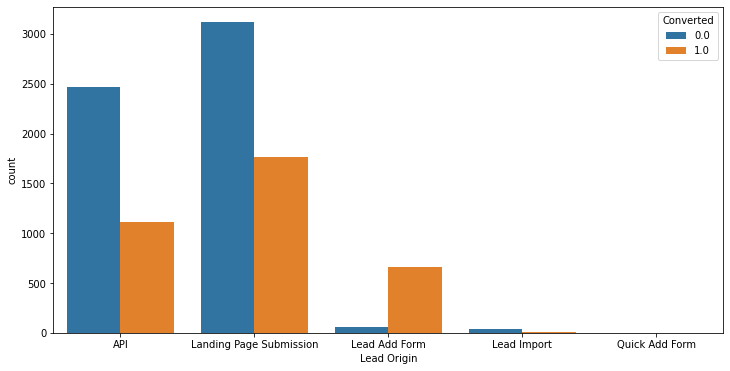

In [7851]:
plt.figure(figsize=(12,6))
sns.countplot(leads_df_drp['Lead Origin'], hue=leads_df_drp['Converted'] )
plt.show()

__Observations__

API and Landing Page Submission not only have higher number of leads but also higher conversion. 
Lead Add Form indicates very high conversion rate but count of leads from it are not very high. 
Lead Import and Quick Add Form get few number of leads only. So, to improve lead conversion rate, we have to work on lead converion of API and Landing Page Submission origin, along with that need to bring more leads from Lead Add Form.

Univariant Analysis - Lead Source

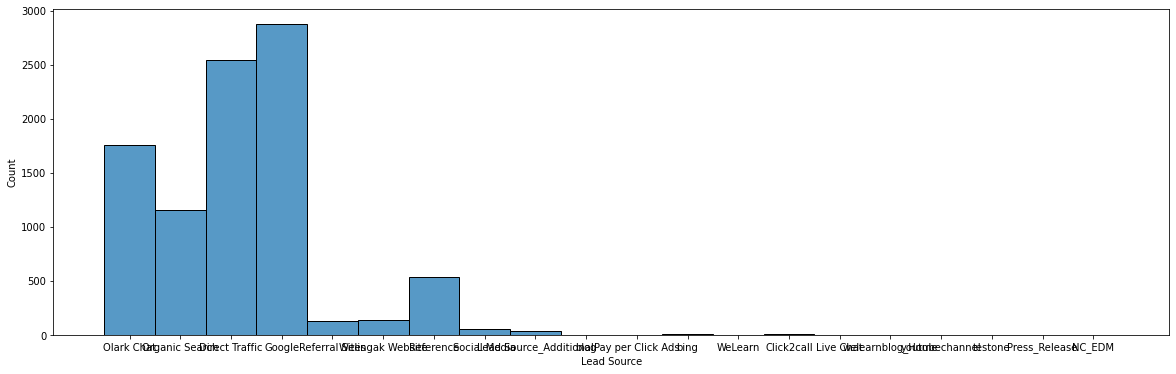

In [7852]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['Lead Source'])
plt.show()

Bivariant Analysis - Lead Source

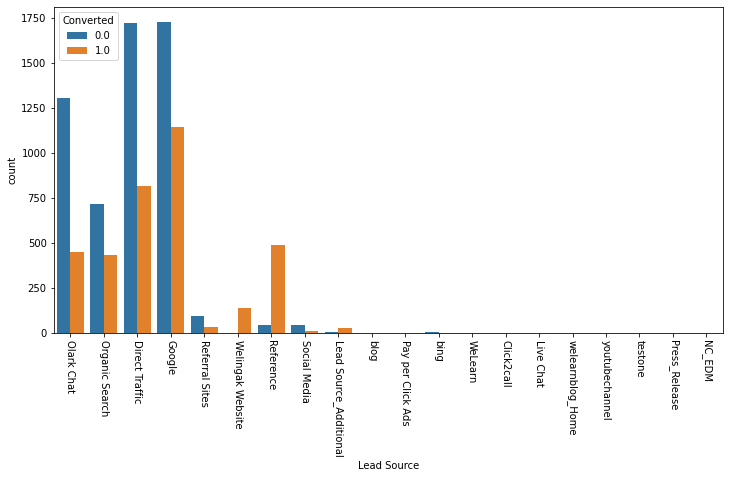

In [7853]:
plt.figure(figsize=(12,6))
xaxis = sns.countplot(leads_df_drp['Lead Source'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__
    
1. Google and Direct traffic have the higher number of leads and conversion also.
2. Welinkar Website and Reference have very higher conversion rate compared to their leads.
3. To enhance the conversion, we need to focus on Olark Chat, Organic Search , Google and direct traffic 
    as leads are higher for these but conversion rate is not that much high.
    

In [7854]:
# We will combine the various low frequency Lead Source to Lead Source_Additional

#leads_df_drp['Lead Source'] =leads_df_drp['Lead Source'].replace(np.nan,'Lead Source_Additional')

leads_df_drp['Lead Source'] = np.where(leads_df_drp['Lead Source'].isin([
    'bing','Click2call','Press_Release','Live Chat','youtubechannel','Pay per Click Ads','welearnblog_Home','NC_EDM','blog','WeLearn','testone'
    ]), 'Lead Source_Additional',leads_df_drp['Lead Source'])


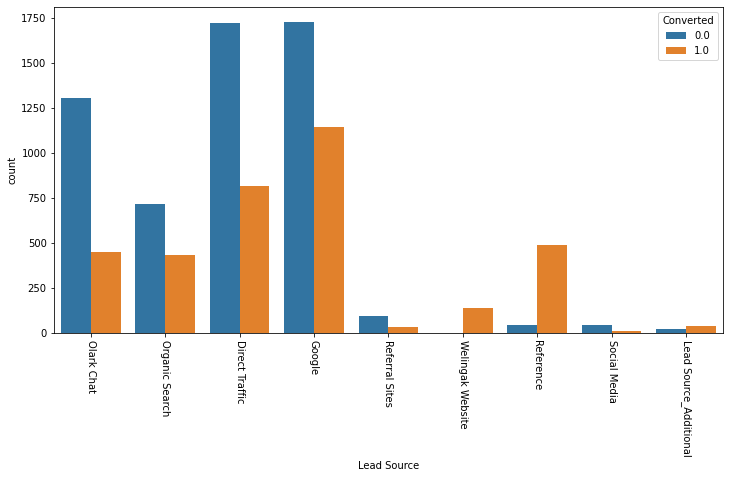

In [7855]:
plt.figure(figsize=(12,6))
xaxis = sns.countplot(leads_df_drp['Lead Source'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

Univariant Analysis - Do Not Email

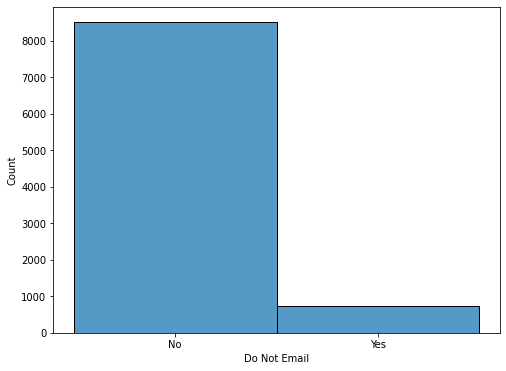

In [7856]:
plt.figure(figsize=(8,6))
sns.histplot(leads_df_drp['Do Not Email'])
plt.show()

Bivariant Analysis - Do Not Email

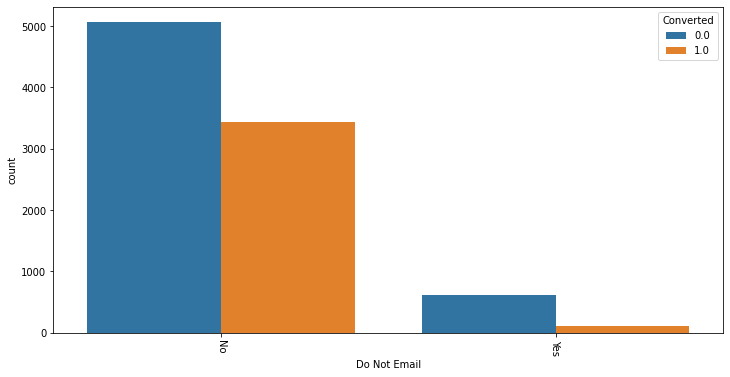

In [7857]:
plt.figure(figsize=(12,6))
xaxis = sns.countplot(leads_df_drp['Do Not Email'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

Univariant Analysis - Do Not Call

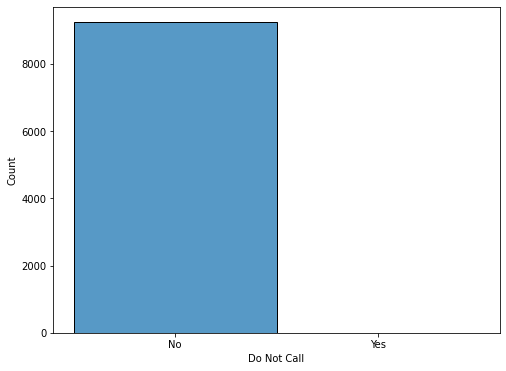

In [7858]:
plt.figure(figsize=(8,6))
sns.histplot(leads_df_drp['Do Not Call'])
plt.show()

Bivariant Analysis - Do Not Call

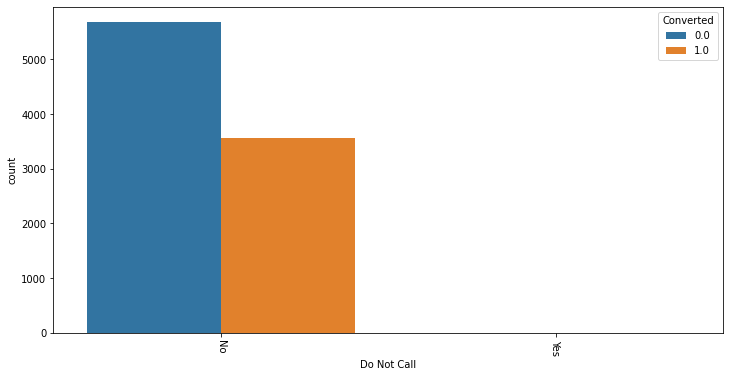

In [7859]:
plt.figure(figsize=(12,6))
xaxis = sns.countplot(leads_df_drp['Do Not Call'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

Univariant Analysis - Last Activity

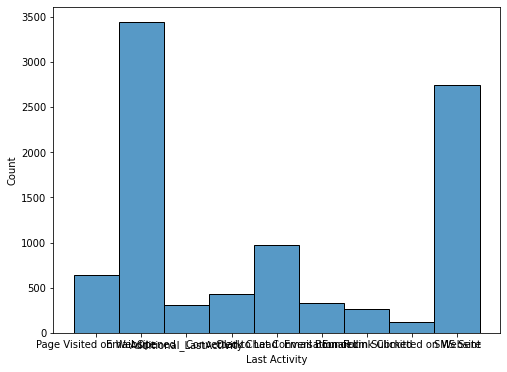

In [7860]:
plt.figure(figsize=(8,6))
sns.histplot(leads_df_drp['Last Activity'])
plt.show()

Bivariant Analysis - Last Activity

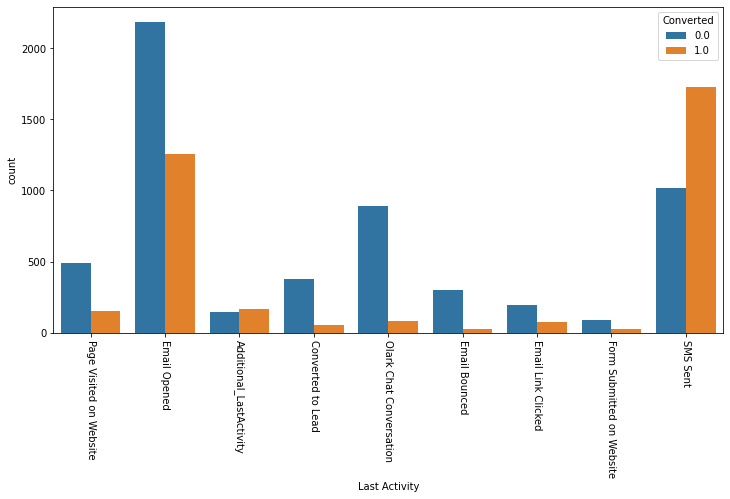

In [7861]:
plt.figure(figsize=(12,6))
xaxis = sns.countplot(leads_df_drp['Last Activity'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__
    
1. Email Opened has higher number of leads as well as conversion.
2. SMS sent has high conversion rate.
3. Need to focus on improving Email Opened for better conversion rate and Olark Chat Conversation .

Univariant Analysis - Country

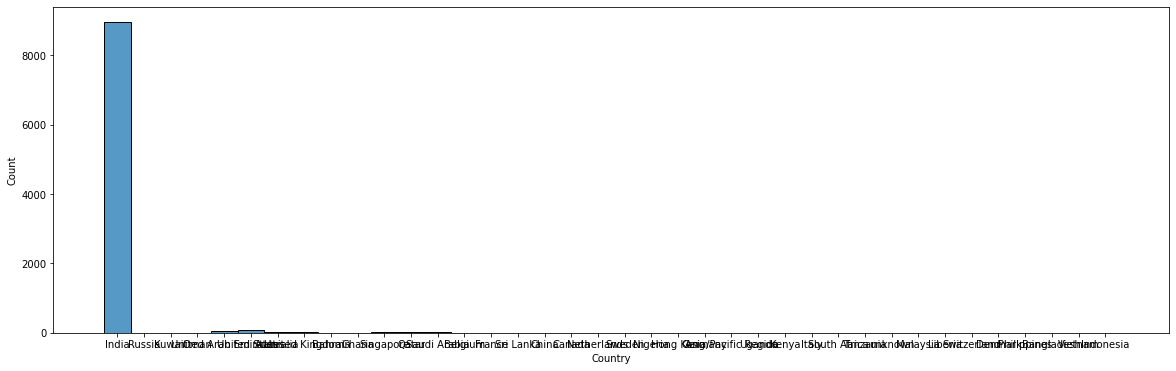

In [7862]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['Country'])

plt.show()

Bivariant Analysis - Country

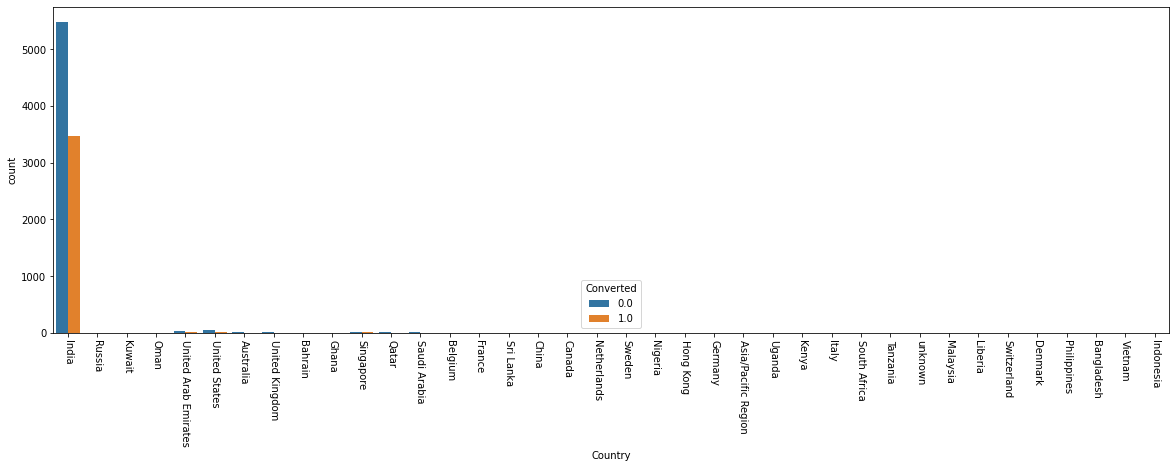

In [7863]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['Country'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__
    
1. From the above plot we can say that almost all leads and conversion belong to India as country.So, for model creation we can drop this column as it will not contribute in analysing much.
2. We need to focus on improving leads from other countries and conversion too.


Univariant Analysis - Specialization

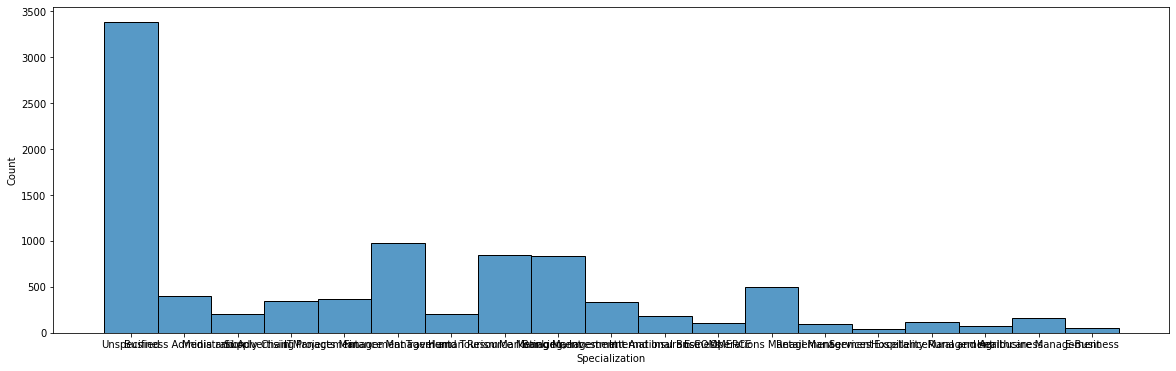

In [7864]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['Specialization'])

plt.show()

Bivariant Analysis - Specialization

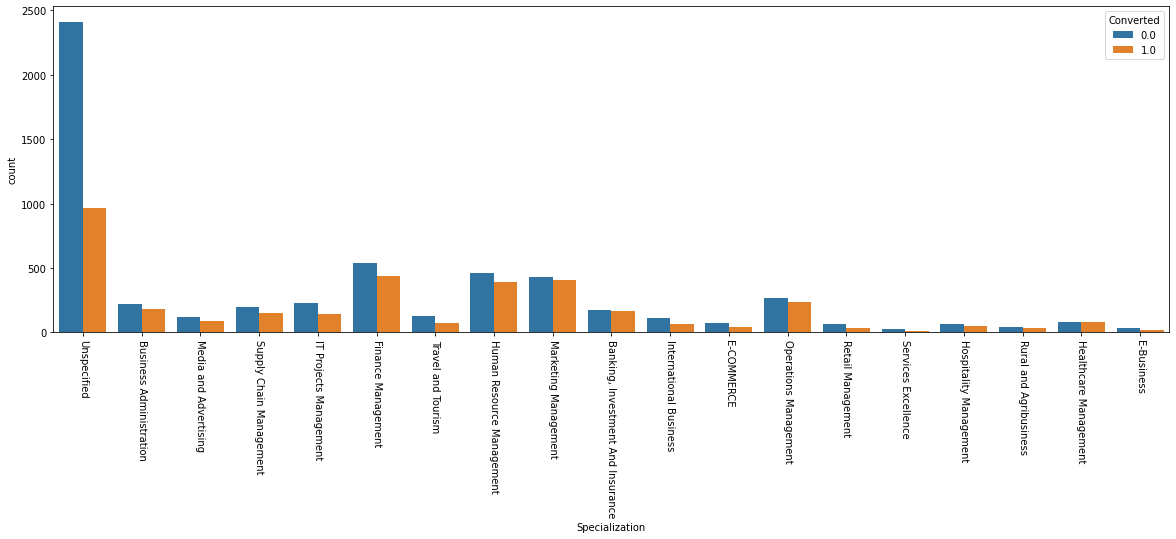

In [7865]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['Specialization'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

As we can see that Unspecified which is combination of various low frequency specialization has higher leads.
If observed carefully all the management related specialization have more leads alongwith higher conversion.
If we combine all management related specializations into one we can clearly observe that. 

In [7866]:
leads_df_drp['Specialization'] = np.where((leads_df_drp['Specialization'].isin(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management']))
          ,'Management_Specialization',leads_df_drp['Specialization'])

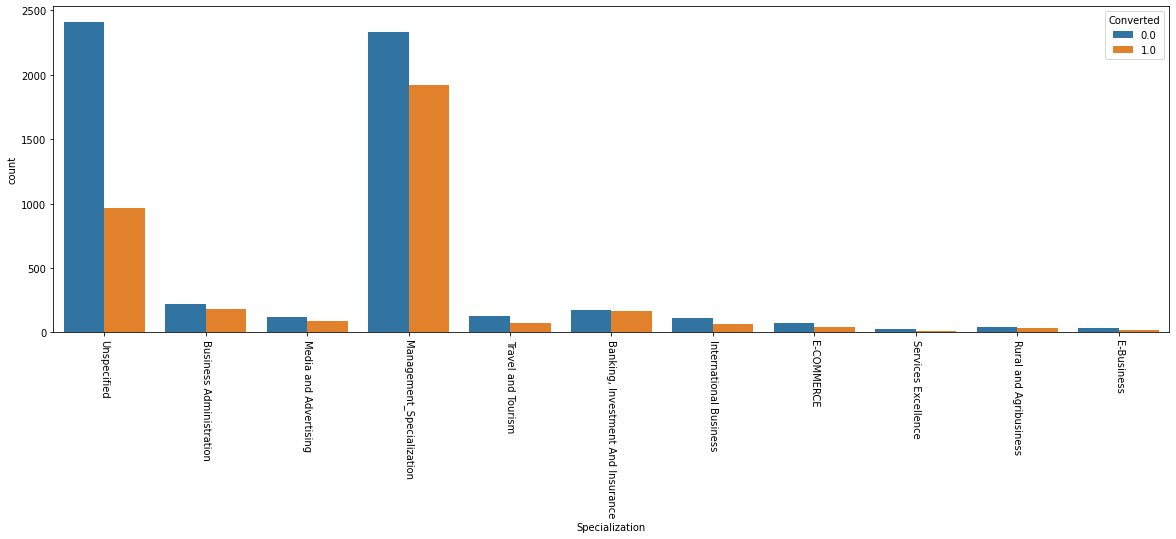

In [7867]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['Specialization'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

1. Here, we can have clear understanding that Management specialized leads are more inclined towards getting converted. 
2. Banking ,Investment and Insurance and Business Adminstration specialization have higher conversion rate.
3. Need to focus on improving leads from management and bring more leads for Business Adminstration and Banking,Investment and Insurance.

Univariant Analysis - What is your current occupation

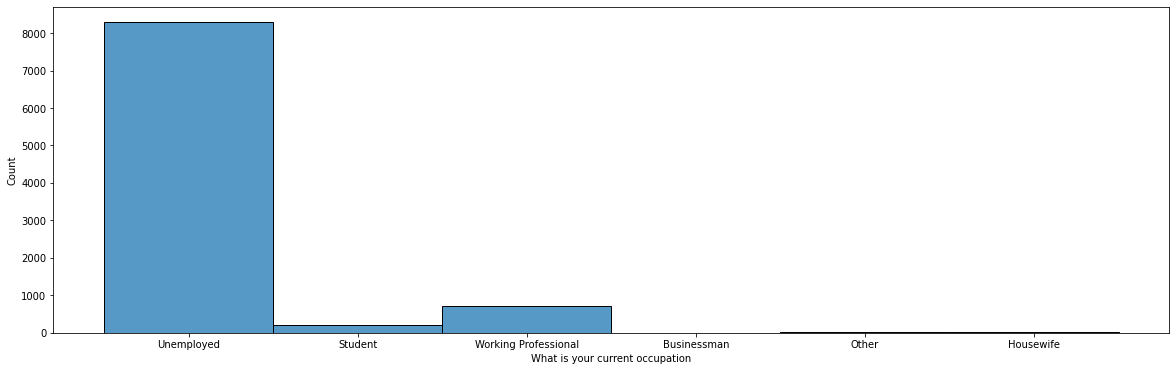

In [7868]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['What is your current occupation'])

plt.show()

Bivariant Analysis -  What is your current occupation

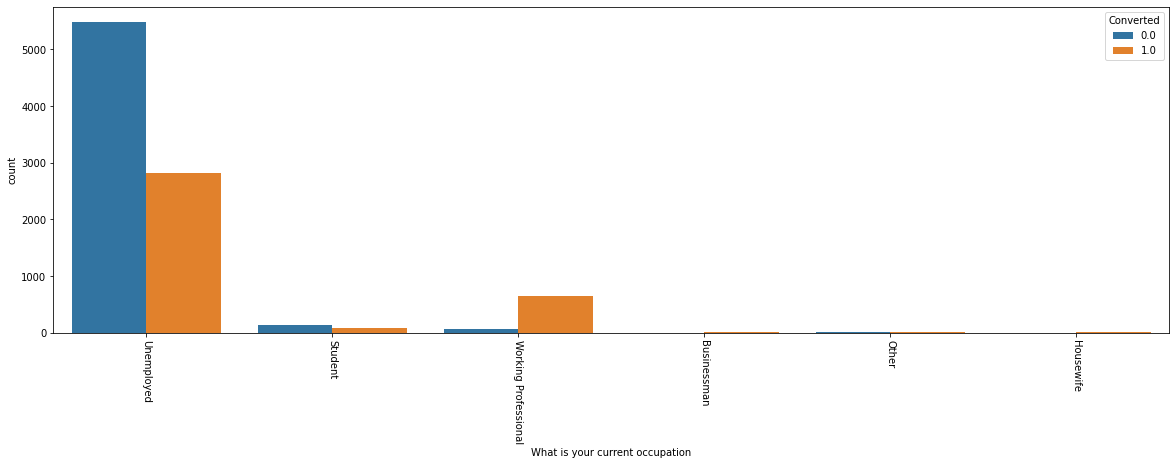

In [7869]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['What is your current occupation'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__
    
1. The leads from Unemployed type is higher and conversion too.
2. Leads from working professional is low but the conversion rate is quite high.
3. Need to improve leads from working professionals to get high conversion rate

Univariant Analysis -  Tags

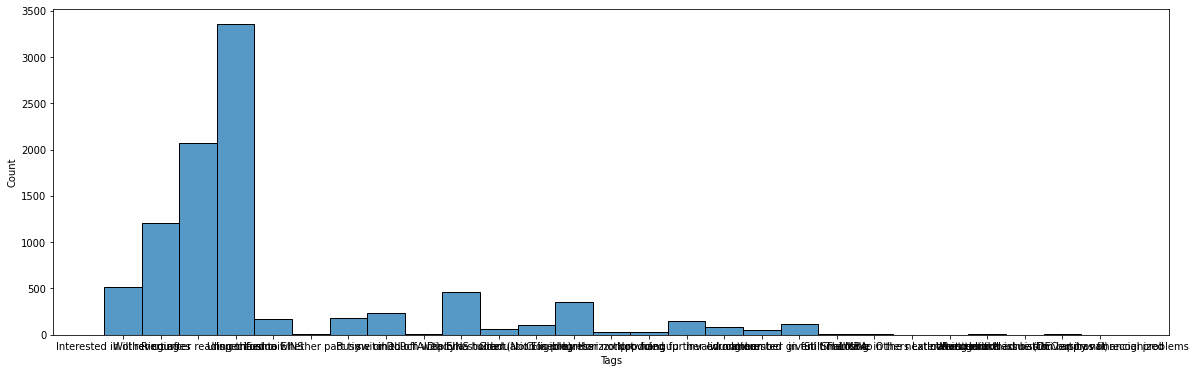

In [7870]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['Tags'])

plt.show()

Bivariant Analysis - Tags

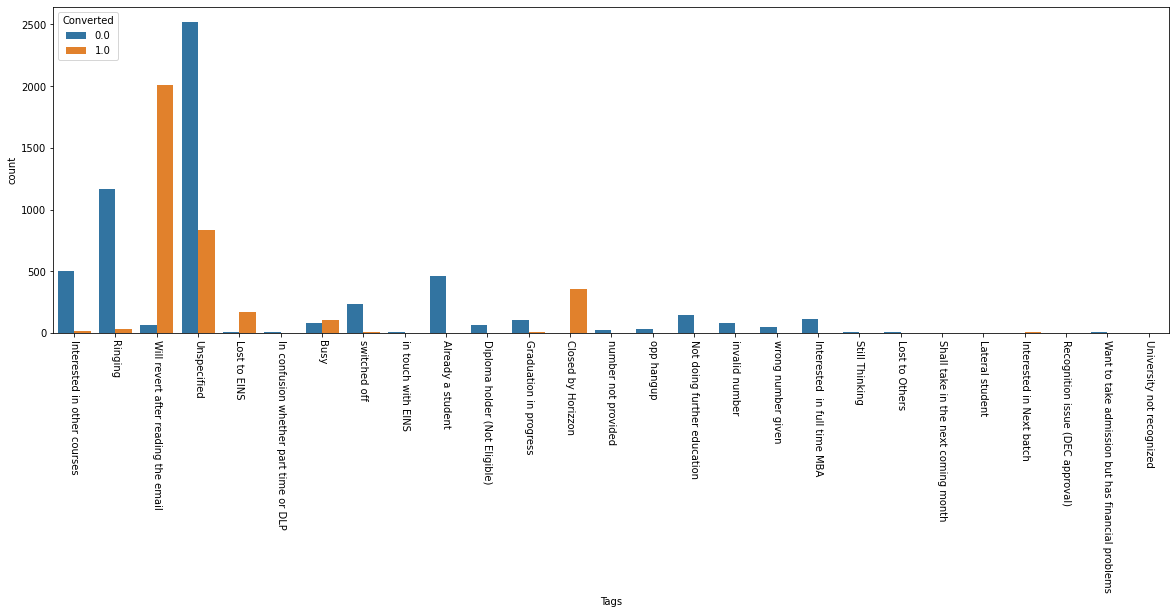

In [7871]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['Tags'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__

1. Will revert after reading email has higher conversion rate.
2. Ringing and Intersted in other courses have high number of leads.
3. Lost to EINS, Busy and closed by Horizon also have high conversion rate.

In [7872]:
# we will merge the low frequency / conversion rate type into Other_tags

leads_df_drp['Tags'] = leads_df_drp['Tags'].replace(['In confusion whether part time or DLP','switched off', 'in touch with EINS','Already a student','Diploma holder (Not Eligible)',
                                     'Graduation in progress', 'number not provided', 'opp hangup', 'Not doing further education', 'invalid number', 'wrong number given',
                                        'Interested  in full time MBA','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'                
                                    ], 'Other_Tags')
leads_df_drp['Tags'].value_counts()

Unspecified                            3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

Univariant Analysis - Last Notable Activity

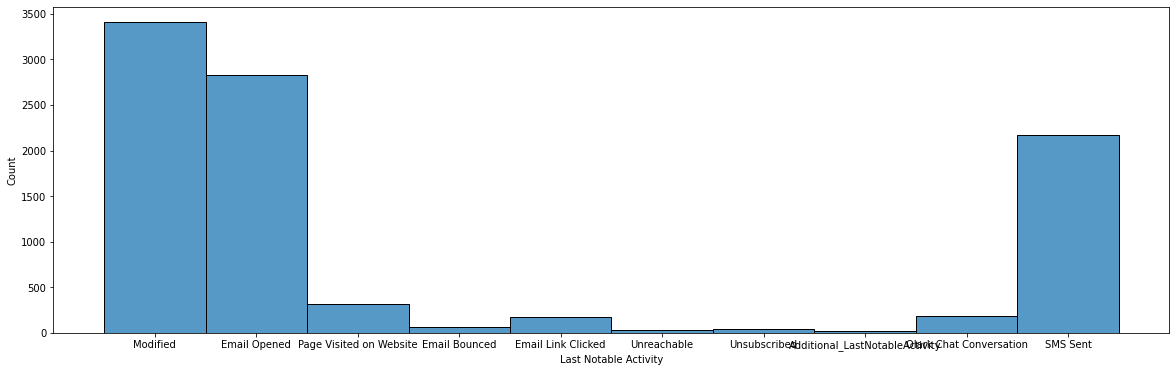

In [7873]:
plt.figure(figsize=(20,6))
sns.histplot(leads_df_drp['Last Notable Activity'])

plt.show()

Bivariant Analysis - Last Notable Activity

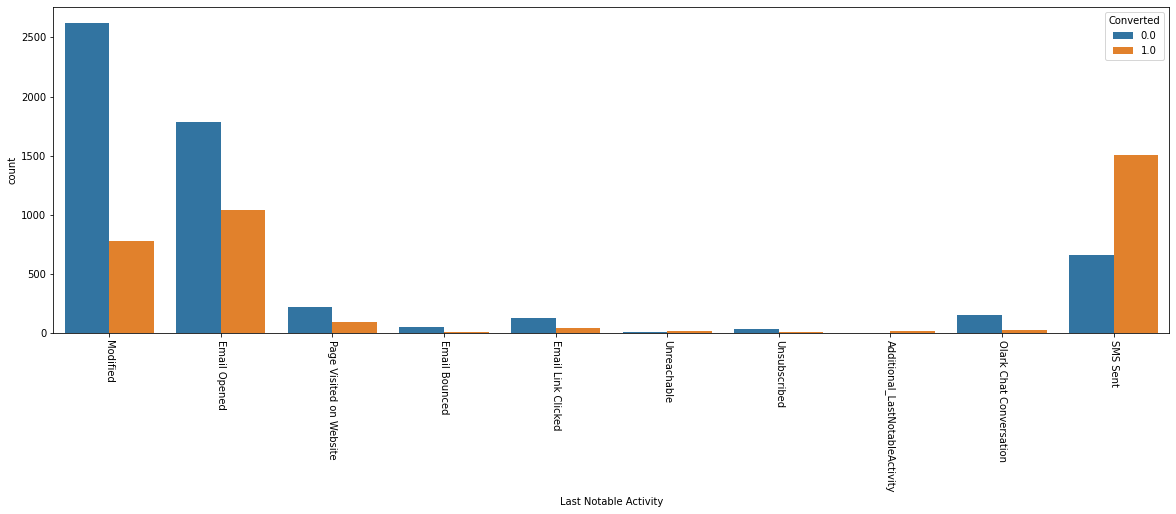

In [7874]:
plt.figure(figsize=(20,6))
xaxis = sns.countplot(leads_df_drp['Last Notable Activity'], hue=leads_df_drp['Converted'] )
xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
plt.show()

__Observations:__

1. Email Opened has high leads as well as high conversion conversion rate.
2. Modified also has high leads and good conversion rate.
3. SMS sent has higher conversion rate.
4. To improve need to focus on bringing more leads for Email Opened and SMS sent which has high conversion rate.

We can merge the low occuring activities like Unreachable,Unsubscribed, Email Bounced which has very low leads and conversion into one. 

In [7875]:
leads_df_drp['Last Notable Activity'] = leads_df_drp['Last Notable Activity'].replace(['Unreachable','Unsubscribed', 'Email Bounced'], 'Additional_LastNotableActivity')
leads_df_drp['Last Notable Activity'].value_counts()

Modified                          3407
Email Opened                      2827
SMS Sent                          2172
Page Visited on Website            318
Olark Chat Conversation            183
Email Link Clicked                 173
Additional_LastNotableActivity     160
Name: Last Notable Activity, dtype: int64

In [7876]:
# remaining categorical columns having data imbalance and are not significant variable
column_to_be_dropped

['Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

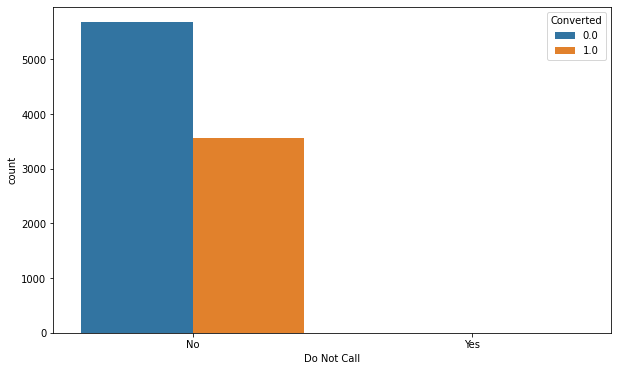

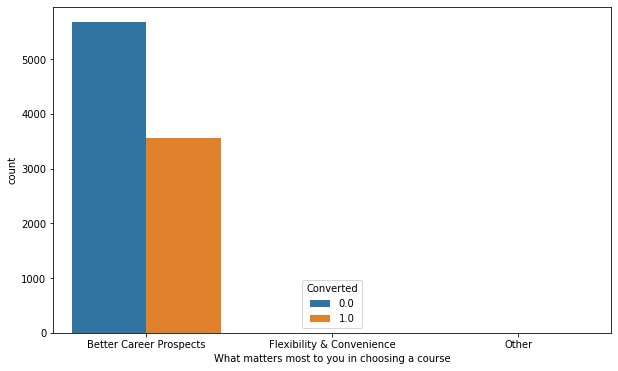

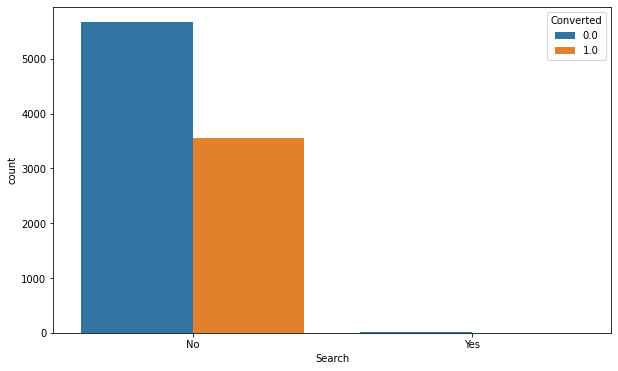

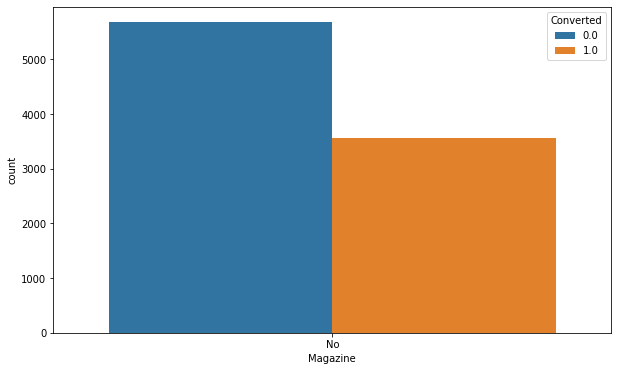

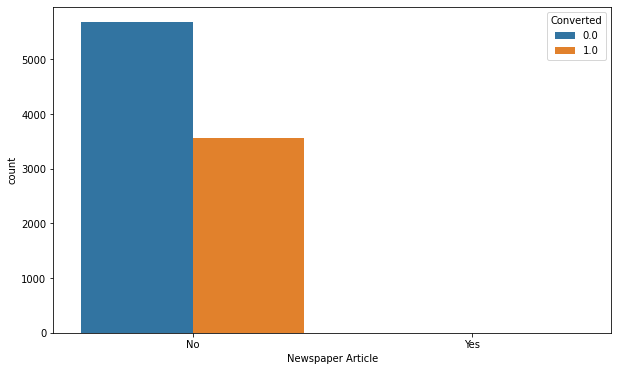

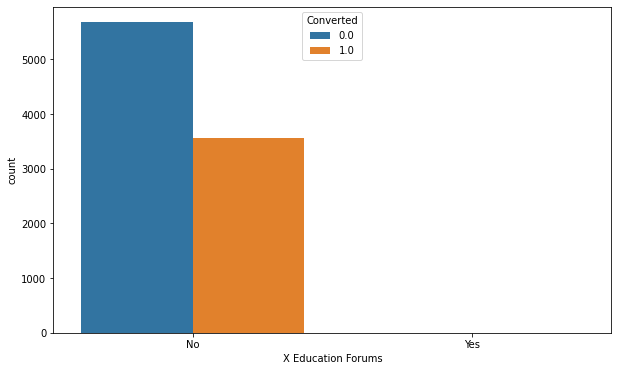

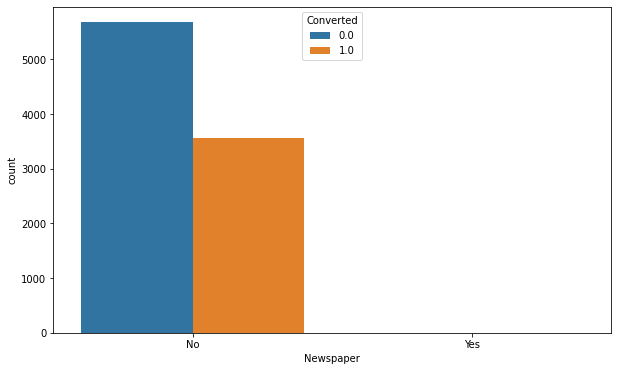

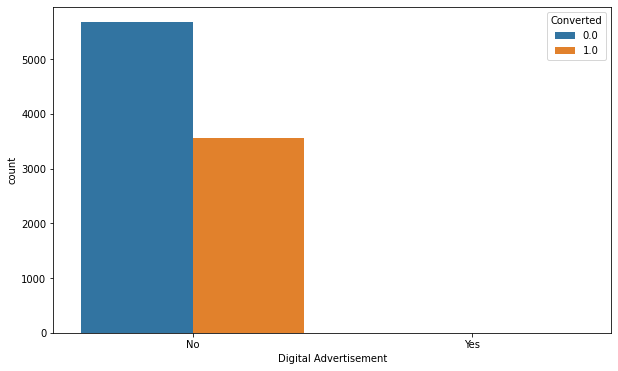

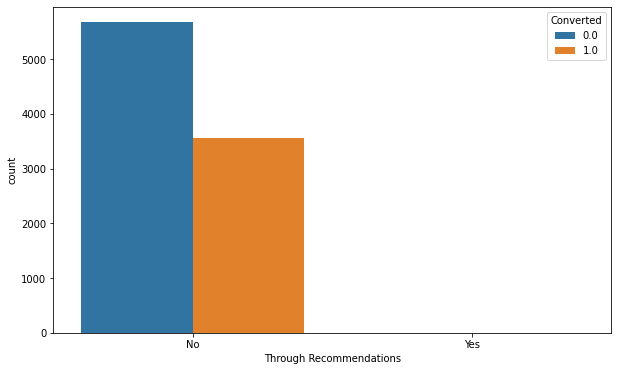

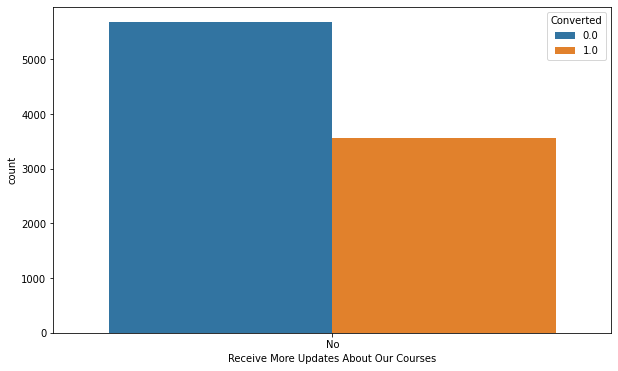

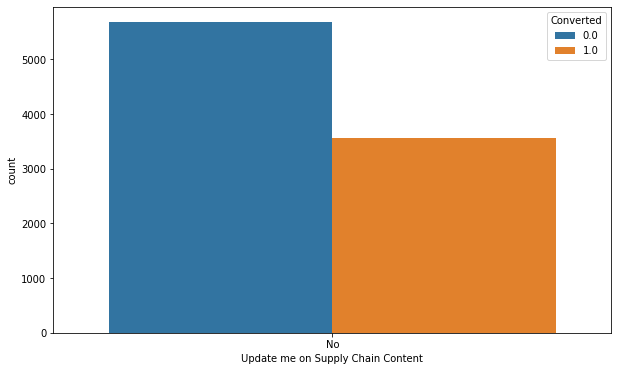

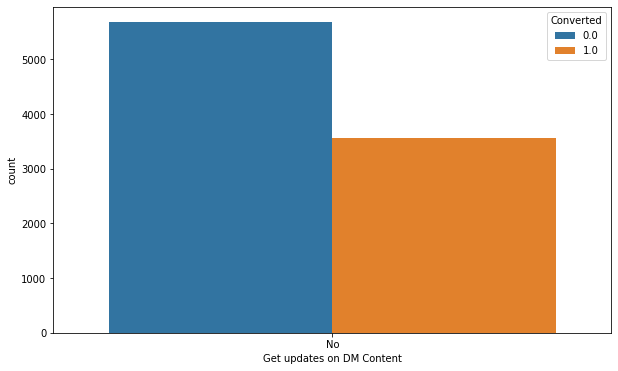

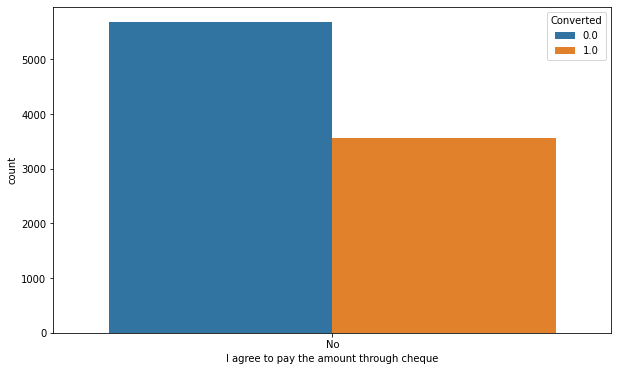

In [7877]:
for i in column_to_be_dropped:
    plt.figure(figsize=(10,6))
    xaxis = sns.countplot(leads_df_drp[i], hue=leads_df_drp['Converted'] )
    #xaxis.set_xticklabels(xaxis.get_xticklabels(),rotation=270)
    plt.show()

__Continuous/ Numberical variables__

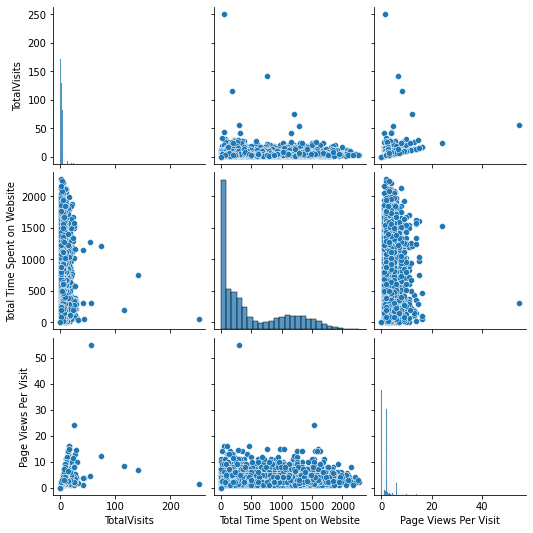

In [7878]:
cont_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.pairplot(leads_df_drp[cont_cols])

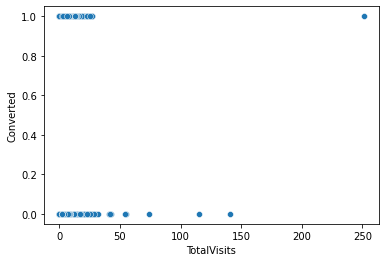

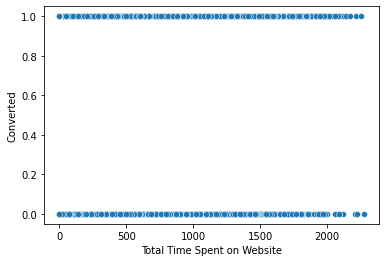

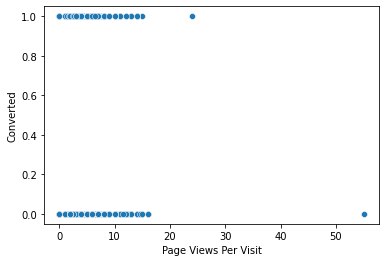

In [7879]:
for i in cont_cols:
    sns.scatterplot(x=leads_df_drp[i],y=leads_df_drp["Converted"])
    plt.show()

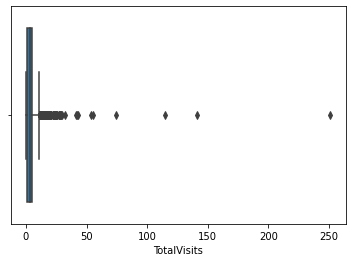

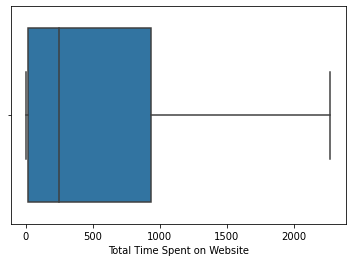

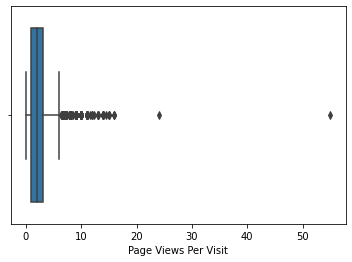

In [7880]:
for i in cont_cols:
    sns.boxplot(x=leads_df_drp[i])
    plt.show()

There are outliers Totalvisists and Page Views Per Visit, which needs to be handled. 
We will eliminate above 99 percentile and below 1 percentile data to get rid of outliers so it does not impact mode.

Total time Spent on Website does not have outliers, so no handling required.

In [7881]:
leads_df_drp['TotalVisits'].describe(percentiles=[0.10,.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

As we can see above the 99 percentile there are values which are quite high.Which will impact the variable.


In [7882]:
# Eliminating the outliers for TotalVisits


#leads_df_drp['TotalVisits'] = (leads_df_drp['TotalVisits'] <= leads_df_drp['TotalVisits'].quantile(0.99))
#leads_df_drp['TotalVisits'] =  (leads_df_drp['TotalVisits'] >= leads_df_drp['TotalVisits'].quantile(0.01))

Q3 = leads_df_drp.TotalVisits.quantile(0.99)
leads_df_drp = leads_df_drp[(leads_df_drp.TotalVisits <= Q3)]
Q1 = leads_df_drp.TotalVisits.quantile(0.01)
leads_df_drp = leads_df_drp[(leads_df_drp.TotalVisits >= Q1)]


#leads_df_drp = leads_df_drp[( leads_df_drp.TotalVisits.quantile(0.01) <= leads_df_drp.TotalVisits <= leads_df_drp.TotalVisits.quantile(0.99))]
leads_df_drp['TotalVisits'].describe()

count    9020.000000
mean        3.206984
std         2.990108
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

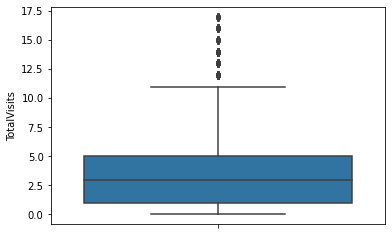

In [7883]:
sns.boxplot(y=leads_df_drp['TotalVisits'])
plt.show()

In [7884]:
leads_df_drp['Page Views Per Visit'].describe(percentiles=[0.10,.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [7885]:
# Eliminating the outliers for Page Views Per Visit
Q3 = leads_df_drp['Page Views Per Visit'].quantile(0.99)
leads_df_drp = leads_df_drp[(leads_df_drp['Page Views Per Visit'] <= Q3)]
Q1 = leads_df_drp['Page Views Per Visit'].quantile(0.01)
leads_df_drp = leads_df_drp[(leads_df_drp['Page Views Per Visit'] >= Q1)]


#leads_df_drp = leads_df_drp[( leads_df_drp.Page Views Per Visit.quantile(0.01) <= leads_df_drp.Page Views Per Visit <= leads_df_drp.Page Views Per Visit.quantile(0.99))]
leads_df_drp['Page Views Per Visit'].describe()

count    8953.000000
mean        2.266858
std         1.895221
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

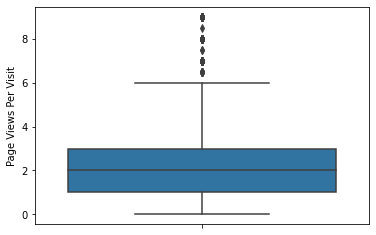

In [7886]:
sns.boxplot(y=leads_df_drp['Page Views Per Visit'])
plt.show()

In [7887]:
# dropped column from data frame which are in-significant
leads_df_drp_imbalance = leads_df_drp
leads_df_drp_imbalance = leads_df_drp_imbalance.drop(column_to_be_dropped, axis = 1 )
leads_df_drp_imbalance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8953 non-null   object 
 1   Lead Number                             8953 non-null   float64
 2   Lead Origin                             8953 non-null   object 
 3   Lead Source                             8953 non-null   object 
 4   Do Not Email                            8953 non-null   object 
 5   Converted                               8953 non-null   float64
 6   TotalVisits                             8953 non-null   float64
 7   Total Time Spent on Website             8953 non-null   float64
 8   Page Views Per Visit                    8953 non-null   float64
 9   Last Activity                           8953 non-null   object 
 10  Country                                 8953 non-null   obje

In [7888]:
leads_df_drp_imbalance = leads_df_drp_imbalance.drop(['Country','Prospect ID','Lead Number'], axis =1)
leads_df_drp_imbalance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   float64
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   float64
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

<AxesSubplot:>

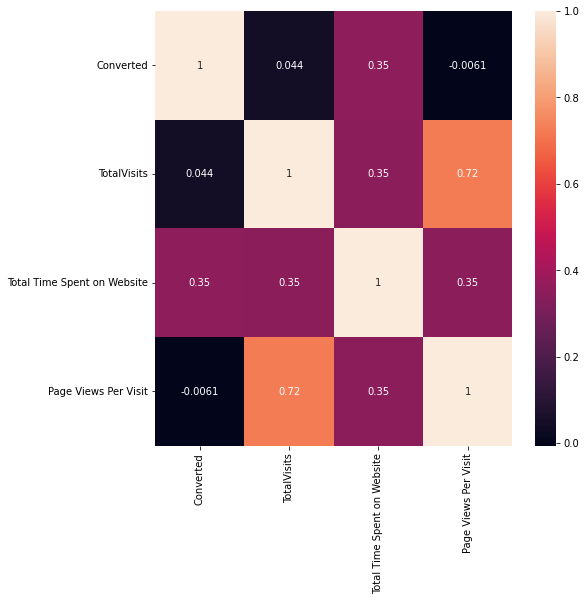

In [7889]:
# Checking the co-relation matrix

plt.figure(figsize=(8,8))
sns.heatmap(leads_df_drp_imbalance.corr(),annot=True)

In [7890]:
# Checking info of df after preparation
leads_df_drp_imbalance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   float64
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   float64
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [7891]:
# Checking null values after dropping and imputation. 
(leads_df_drp_imbalance.isnull().sum()/len(leads_df_drp_imbalance.index))*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [7892]:
# after removing the outliers of continuous variables
leads_df_drp_imbalance.shape

(8953, 14)

# Dummy variable creation for categorical column

In [7893]:
cat_cols = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','Tags','City','A free copy of Mastering The Interview','Last Notable Activity'
]

Categorical columns having Yes/No type of values are Do Not Email and A free copy of Mastering The Interview. 
As there are only 2 values will map to numeric value.

In [7894]:
# as below column only have 2 values, so will map to 0/1 
varlist = ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [7895]:
# Applying the function to the variable list
leads_df_drp_imbalance[varlist] = leads_df_drp_imbalance[varlist].apply(binary_map)

In [7896]:
leads_df_drp_imbalance.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0.0,0.0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0.0,5.0,674.0,2.5,Email Opened,Unspecified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0.0,1.0,305.0,1.0,Additional_LastActivity,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1.0,2.0,1428.0,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [7897]:
# Creating dummies for column (having more than 2 level) does not have unknown / unspecified value type , which need to be dropped separately after dummy creation
dummies = pd.get_dummies(leads_df_drp_imbalance[['Lead Origin', 'What is your current occupation','City']], drop_first=True)
dummies

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,1,0,0,0,0,0,0
9236,1,0,0,0,0,0,1,0,0,0,0,0,0
9237,1,0,0,0,0,0,1,0,0,0,0,0,0
9238,1,0,0,0,0,0,1,0,0,0,1,0,0


In [7898]:
leads_df_drp_imbalance = pd.concat([leads_df_drp_imbalance,dummies],1)

In [7899]:
dummies = pd.get_dummies(leads_df_drp_imbalance[['Lead Source','Last Activity','Specialization','Tags','Last Notable Activity']])
dummies

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Lead Source_Additional,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Additional_LastActivity,...,Tags_Ringing,Tags_Unspecified,Tags_Will revert after reading the email,Last Notable Activity_Additional_LastNotableActivity,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9238,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [7900]:
dummies = dummies.drop(['Lead Source_Lead Source_Additional','Last Activity_Additional_LastActivity','Specialization_Unspecified','Tags_Unspecified','Last Notable Activity_Additional_LastNotableActivity'], axis =1 )
dummies

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9237,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9238,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7901]:
leads_df_drp_imbalance = pd.concat([leads_df_drp_imbalance,dummies],1)

In [7902]:
#We will drop all the original columns 

leads_df_drp_imbalance.drop(cat_cols,1,inplace = True)
leads_df_drp_imbalance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   float64
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   float64
 3   Page Views Per Visit                                  8953 non-null   float64
 4   Lead Origin_Landing Page Submission                   8953 non-null   uint8  
 5   Lead Origin_Lead Add Form                             8953 non-null   uint8  
 6   Lead Origin_Lead Import                               8953 non-null   uint8  
 7   What is your current occupation_Housewife             8953 non-null   uint8  
 8   What is your current occupation_Other                 8953

In [7903]:
leads_df_drp_imbalance.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1.0,2.0,1532.0,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0.0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1.0,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


<AxesSubplot:>

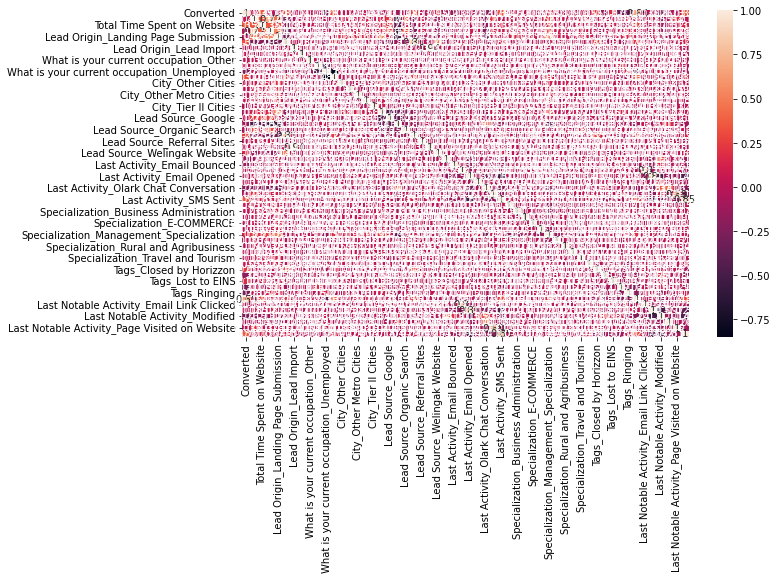

In [7904]:
plt.figure(figsize=(10,6))
sns.heatmap(leads_df_drp_imbalance.corr(),annot=True)

# Model Building

As it's a classification problem, will be building logistic model.

__Train Test Split of data__

In [7905]:
X=leads_df_drp_imbalance.drop(["Converted"],axis=1)
Y=leads_df_drp_imbalance[["Converted"]]

In [7906]:
print("X_train Shape:",X_train.shape)
print("Y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("Y_test Shape:",y_test.shape)

X_train Shape: (6267, 15)
Y_train Shape: (6267, 1)
X_test Shape: (2686, 15)
Y_test Shape: (2686, 2)


In [7907]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Total Time Spent on Website                           6267 non-null   float64
 1   Lead Origin_Landing Page Submission                   6267 non-null   float64
 2   What is your current occupation_Working Professional  6267 non-null   float64
 3   Lead Source_Welingak Website                          6267 non-null   float64
 4   Last Activity_Email Opened                            6267 non-null   float64
 5   Last Activity_Olark Chat Conversation                 6267 non-null   float64
 6   Last Activity_SMS Sent                                6267 non-null   float64
 7   Tags_Closed by Horizzon                               6267 non-null   float64
 8   Tags_Interested in other courses                      6

In [7908]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Converted  6267 non-null   float64
dtypes: float64(1)
memory usage: 97.9 KB


__Scale the Data__

In [7909]:
scaler = StandardScaler()
#cols = X_train.columns
cols = X.columns
print(cols)
#X_train[cols] = scaler.fit_transform(X_train)
X[cols] = scaler.fit_transform(X)

X.head()
#X_train.head()

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Las

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,-1.082463,-0.877950,-1.196159,-1.067623,-0.269684,-0.058945,-0.031722,-0.038133,-0.152699,0.334305,...,-0.138707,-0.42285,-0.386195,-0.536671,-0.139124,-0.672656,1.333036,-0.144049,-0.182311,-0.560967
1,0.639515,0.360679,0.123023,-1.067623,-0.269684,-0.058945,-0.031722,-0.038133,-0.152699,0.334305,...,-0.138707,-0.42285,2.589367,-0.536671,-0.139124,1.486644,-0.750167,-0.144049,-0.182311,-0.560967
2,-0.393672,1.937451,-0.140814,0.936660,-0.269684,-0.058945,-0.031722,-0.038133,6.548836,-2.991284,...,-0.138707,-0.42285,-0.386195,1.863338,-0.139124,1.486644,-0.750167,-0.144049,-0.182311,-0.560967
3,-0.738068,-0.317443,-0.668486,0.936660,-0.269684,-0.058945,-0.031722,-0.038133,-0.152699,0.334305,...,-0.138707,-0.42285,2.589367,-0.536671,-0.139124,-0.672656,1.333036,-0.144049,-0.182311,-0.560967
4,-0.393672,1.746327,-0.668486,0.936660,-0.269684,-0.058945,-0.031722,-0.038133,-0.152699,0.334305,...,-0.138707,-0.42285,-0.386195,1.863338,-0.139124,-0.672656,1.333036,-0.144049,-0.182311,-0.560967


In [7910]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size =0.7 ,test_size=0.3,random_state=100)

In [7911]:
# Creating logistic regression model
estimator=LogisticRegression()

# creating RFE for 15 features to select
rfe=RFE(estimator,n_features_to_select=15)


In [7912]:
rfe = rfe.fit(X_train,y_train)

In [7913]:
rfe.support_

array([False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True])

In [7914]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', False, 7),
 ('Lead Origin_Lead Import', False, 6),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Other', False, 38),
 ('What is your current occupation_Student', False, 29),
 ('What is your current occupation_Unemployed', False, 23),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 25),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 41),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 33),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', False, 24),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Sourc

In [7915]:
# Columns selected by rfe for model building
cols_to_keep=list(X_train.columns[rfe.support_])
cols_to_keep

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'What is your current occupation_Working Professional',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent']

In [7916]:
# Eliminated columns

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specializatio

In [7917]:
# keeping only the required column in train and test data
X_train=X_train[cols_to_keep]
X_test=X_test[cols_to_keep]

In [7918]:
X_train.shape,X_test.shape

((6267, 15), (2686, 15))

In [7919]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('What is your current occupation_Working Professional', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 6),
 ('Last Activity_SMS Sent', False, 17),
 ('Tags_Closed by Horizzon', False, 38),
 ('Tags_Interested in other courses', False, 29),
 ('Tags_Lost to EINS', False, 23),
 ('Tags_Other_Tags', True, 1),
 ('Tags_Ringing', False, 25),
 ('Tags_Will revert after reading the email', False, 37),
 ('Last Notable Activity_Modified', False, 41),
 ('Last Notable Activity_SMS Sent', False, 36)]

In [7920]:
### Checking the Converted Rate
Converted = (sum(leads_df_drp_imbalance['Converted'])/len(leads_df_drp_imbalance['Converted'].index))*100
Converted

37.92025019546521

__Building First model__

In [7921]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test,has_constant='add')
#print(X_train_sm.shape,X_test_sm.shape)
model1=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1225.3
Date:                Mon, 11 Jul 2022   Deviance:                       2450.6
Time:                        22:49:40   Pearson chi2:                 7.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8067      0.079    -10.218      0.000      -0.961      -0.652
Total Time Spent on Website                              0.9550      0.055     17.344      0.000       0.847       1.063
Lead Origin_Landing Page Submission                     -0.5743      0.059     -9.779      0.000      -0.689      -0.459
What is your current occupation_Working Professional     0.2719      0.109      2.486      0.013       0.058       0.486
Lead Source_Welingak Website                             0.6272      0.122      5.154      0.000       0.389       0.866
Last Activity_Email Opened                               0.3830      0.088      4.351      0.000       0.210       0.556
Last Activity_Olark Chat Conversation                   -0.2127      0.084     -2.523      0.012      -0.378      -0.047
Last Activity_SMS Sent                                   0.6915      0.114      6.053      0.000       0.468       0.915
Tags_Closed by Horizzon                                  1.2748      0.179      7.109      0.000       0.923       1.626
Tags_Interested in other courses                        -0.5482      0.096     -5.727      0.000      -0.736      -0.361
Tags_Lost to EINS                                        0.7819      0.084      9.349      0.000       0.618       0.946
Tags_Other_Tags                                         -0.8529      0.076    -11.271      0.000      -1.001      -0.705
Tags_Ringing                                            -1.1636      0.081    -14.287      0.000      -1.323      -1.004
Tags_Will revert after reading the email                 1.8975      0.080     23.836      0.000       1.741       2.054
Last Notable Activity_Modified                          -0.3448      0.083     -4.144      0.000      -0.508      -0.182
Last Notable Activity_SMS Sent                           0.6490      0.117      5.531      0.000       0.419       0.879
========================================================================================================================
"""

__VIF__

In [7922]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train #X_test
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,5.40
6,Last Activity_SMS Sent,4.76
4,Last Activity_Email Opened,2.28
13,Last Notable Activity_Modified,2.04
12,Tags_Will revert after reading the email,1.59
5,Last Activity_Olark Chat Conversation,1.55
1,Lead Origin_Landing Page Submission,1.26
10,Tags_Other_Tags,1.23
11,Tags_Ringing,1.23
0,Total Time Spent on Website,1.21


The VIF value of Last Notable Activity_SMS Sent variable only seems slightly higher. 
p-value of 'What is your current occupation_Working Professional' and 'Last Activity_Olark Chat Conversation' 
variable is very high as compared to threshold of 0.005.
 We will drop the column 'What is your current occupation_Working Professional' and 'Last Activity_Olark Chat Conversation' 


In [7923]:
#dropping variable with high p-value

cols_to_keep.remove('What is your current occupation_Working Professional')
cols_to_keep.remove('Last Activity_Olark Chat Conversation')
    
cols_to_keep
 #   ['What is your current occupation_Working Professional','Last Activity_Olark Chat Conversation'],1)

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified',
 'Last Notable Activity_SMS Sent']

__Rebuilding Model 2__

In [7924]:
X_train_sm=sm.add_constant(X_train[cols_to_keep])
X_test_sm=sm.add_constant(X_test[cols_to_keep],has_constant='add')
#print(X_train_sm.shape,X_test_sm.shape)
model2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1232.2
Date:                Mon, 11 Jul 2022   Deviance:                       2464.4
Time:                        22:49:40   Pearson chi2:                 8.31e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8199      0.077    -10.653      0.000      -0.971      -0.669
Total Time Spent on Website                  0.9623      0.055     17.502      0.000       0.854       1.070
Lead Origin_Landing Page Submission         -0.5469      0.058     -9.409      0.000      -0.661      -0.433
Lead Source_Welingak Website                 0.6367      0.122      5.222      0.000       0.398       0.876
Last Activity_Email Opened                   0.4817      0.081      5.964      0.000       0.323       0.640
Last Activity_SMS Sent                       0.7975      0.108      7.392      0.000       0.586       1.009
Tags_Closed by Horizzon                      1.3260      0.179      7.409      0.000       0.975       1.677
Tags_Interested in other courses            -0.5384      0.096     -5.608      0.000      -0.727      -0.350
Tags_Lost to EINS                            0.7858      0.083      9.445      0.000       0.623       0.949
Tags_Other_Tags                             -0.8492      0.076    -11.188      0.000      -0.998      -0.700
Tags_Ringing                                -1.1613      0.081    -14.280      0.000      -1.321      -1.002
Tags_Will revert after reading the email     1.9799      0.078     25.413      0.000       1.827       2.133
Last Notable Activity_Modified              -0.3613      0.083     -4.359      0.000      -0.524      -0.199
Last Notable Activity_SMS Sent               0.6363      0.117      5.428      0.000       0.407       0.866
============================================================================================================
"""

All variables are having very low p-value,which indicates that they are significant variable.
Let's see the VIF values for them.

In [7925]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[cols_to_keep]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,5.38
4,Last Activity_SMS Sent,4.38
11,Last Notable Activity_Modified,2.02
3,Last Activity_Email Opened,1.99
10,Tags_Will revert after reading the email,1.40
9,Tags_Ringing,1.23
8,Tags_Other_Tags,1.22
0,Total Time Spent on Website,1.21
1,Lead Origin_Landing Page Submission,1.17
6,Tags_Interested in other courses,1.12


Last Notable Activity_SMS Sent variable shows high VIF value. So will drop it.

In [7926]:
cols_to_keep.remove('Last Notable Activity_SMS Sent')
    
cols_to_keep

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Source_Welingak Website',
 'Last Activity_Email Opened',
 'Last Activity_SMS Sent',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

__Rebuilding Model 3__

In [7927]:
X_train_sm=sm.add_constant(X_train[cols_to_keep])
X_test_sm=sm.add_constant(X_test[cols_to_keep],has_constant='add')
#print(X_train_sm.shape,X_test_sm.shape)
model3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.4
Date:                Mon, 11 Jul 2022   Deviance:                       2494.7
Time:                        22:49:41   Pearson chi2:                 8.71e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8264      0.077    -10.742      0.000      -0.977      -0.676
Total Time Spent on Website                  0.9545      0.055     17.500      0.000       0.848       1.061
Lead Origin_Landing Page Submission         -0.5494      0.057     -9.567      0.000      -0.662      -0.437
Lead Source_Welingak Website                 0.6321      0.122      5.165      0.000       0.392       0.872
Last Activity_Email Opened                   0.3433      0.076      4.518      0.000       0.194       0.492
Last Activity_SMS Sent                       1.2206      0.073     16.747      0.000       1.078       1.363
Tags_Closed by Horizzon                      1.3738      0.179      7.663      0.000       1.022       1.725
Tags_Interested in other courses            -0.5177      0.095     -5.428      0.000      -0.705      -0.331
Tags_Lost to EINS                            0.8174      0.084      9.765      0.000       0.653       0.981
Tags_Other_Tags                             -0.8171      0.074    -10.981      0.000      -0.963      -0.671
Tags_Ringing                                -1.1059      0.079    -13.919      0.000      -1.262      -0.950
Tags_Will revert after reading the email     2.0186      0.080     25.315      0.000       1.862       2.175
Last Notable Activity_Modified              -0.6709      0.064    -10.406      0.000      -0.797      -0.545
============================================================================================================
"""

In [7928]:
# Calculate the VIFs for the new model
#from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[cols_to_keep]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_SMS Sent,1.83
3,Last Activity_Email Opened,1.81
11,Last Notable Activity_Modified,1.47
10,Tags_Will revert after reading the email,1.39
8,Tags_Other_Tags,1.22
9,Tags_Ringing,1.22
0,Total Time Spent on Website,1.21
1,Lead Origin_Landing Page Submission,1.17
6,Tags_Interested in other courses,1.12
5,Tags_Closed by Horizzon,1.07


All variables having low p-value and VIF. indicating all are significant for model building.

<AxesSubplot:>

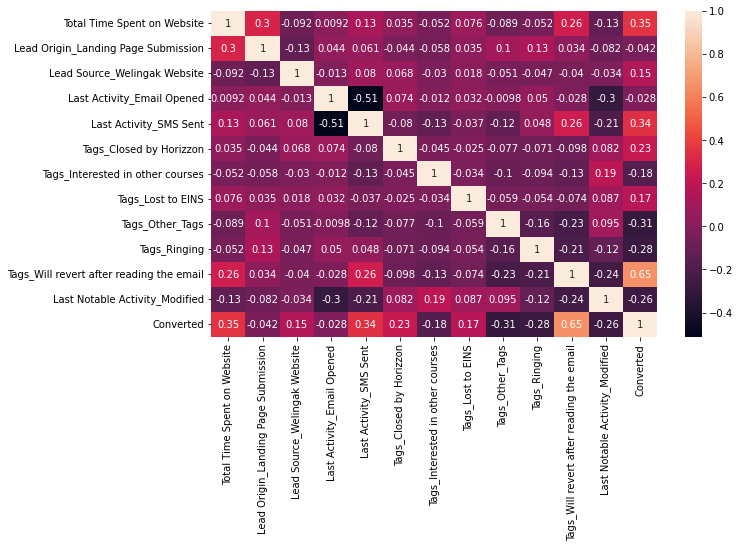

In [7929]:
plt.figure(figsize=(10,6))
df = leads_df_drp_imbalance[cols_to_keep]
df['Converted'] = leads_df_drp_imbalance['Converted']
sns.heatmap(df.corr(),annot=True)

__Prediction on Train data__

In [7930]:
# Getting the Predicted values on the train set
y_train_pred = result3.predict(X_train_sm)
y_train_pred[:25]

9196    0.199670
4696    0.039150
3274    0.379783
2164    0.005367
1667    0.995177
7024    0.173327
8018    0.093645
778     0.130453
6942    0.002610
4440    0.104880
4393    0.173327
989     0.293935
7177    0.865051
8898    0.002610
2714    0.998814
4881    0.977748
2900    0.721506
1067    0.963820
8752    0.007015
6948    0.000985
509     0.004116
2197    0.989837
3129    0.093645
7976    0.019493
6999    0.996644
dtype: float64

In [7931]:
# to put in table format, let's make it one dimentional data by reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.19967015, 0.03915008, 0.37978302, ..., 0.00221163, 0.17332692,
       0.99469762])

In [7932]:
y_train

,Converted
9196,1.0
4696,0.0
3274,0.0
2164,0.0
1667,1.0
...,...
379,1.0
84,1.0
8313,0.0
7169,0.0


In [7933]:
# creating dataframe to view y train actual and y train predicted values in table format
#y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Converted'] = y_train['Converted']
y_train_pred_final['Converted_probability_predicted'] = y_train_pred
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.reset_index()
y_train_pred_final.head()

,Converted,Converted_probability_predicted,Prospect ID
9196,1.0,0.199670,9196
4696,0.0,0.039150,4696
3274,0.0,0.379783,3274
2164,0.0,0.005367,2164
1667,1.0,0.995177,1667


In [7934]:
# Map the probability to prediction,considering cutoff 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_probability_predicted.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_probability_predicted,Prospect ID,Predicted
9196,1.0,0.199670,9196,0
4696,0.0,0.039150,4696,0
3274,0.0,0.379783,3274,0
2164,0.0,0.005367,2164,0
1667,1.0,0.995177,1667,1


In [7935]:
from sklearn import metrics

In [7936]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3724  158]
 [ 288 2097]]


# Model Performance

In [7937]:
# Check overall accuracy

In [7938]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9288335726823042


In [7939]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 


In [7940]:
# sensitivity of logistic regression model
TP / float(TP+FN)

0.879245283018868

In [7941]:
# Let us calculate specificity
TN / float(TN+FP)

0.9592993302421432

In [7942]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.04070066975785677


In [7943]:
# positive predictive value 
print (TP / float(TP+FP))

0.9299334811529933


In [7944]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9282153539381854


# Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [7945]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [7946]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability_predicted, drop_intermediate = False )

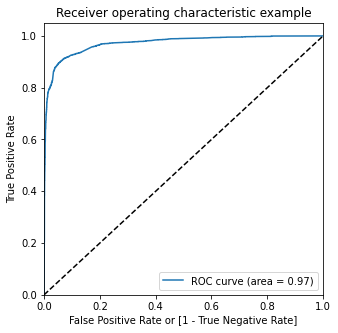

In [7947]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability_predicted)

The ROC curve seems to be good as area under curve is 0.97

# Finding Optimal Cutoff Point

In [7948]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [7949]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability_predicted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1.0,0.199670,9196,0,1,1,0,0,0,0,0,0,0,0
4696,0.0,0.039150,4696,0,1,0,0,0,0,0,0,0,0,0
3274,0.0,0.379783,3274,0,1,1,1,1,0,0,0,0,0,0
2164,0.0,0.005367,2164,0,1,0,0,0,0,0,0,0,0,0
1667,1.0,0.995177,1667,1,1,1,1,1,1,1,1,1,1,1


In [7950]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380565     1.000000     0.000000
0.1   0.1  0.839636     0.972327     0.758114
0.2   0.2  0.900271     0.932495     0.880474
0.3   0.3  0.920217     0.915723     0.922978
0.4   0.4  0.926121     0.898952     0.942813
0.5   0.5  0.928834     0.879245     0.959299
0.6   0.6  0.915430     0.826415     0.970118
0.7   0.7  0.910803     0.800000     0.978877
0.8   0.8  0.905856     0.774004     0.986862
0.9   0.9  0.888942     0.722851     0.990984


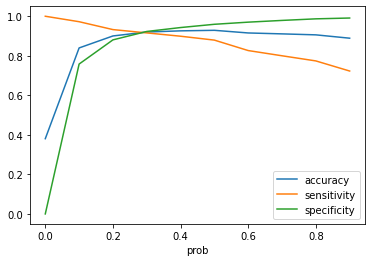

In [7951]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

__From the curve above, 0.3 is the optimum point to take as a cutoff probability.__

In [7952]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability_predicted.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_probability_predicted,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
9196,1.0,0.199670,9196,0,1,1,0,0,0,0,0,0,0,0,0
4696,0.0,0.039150,4696,0,1,0,0,0,0,0,0,0,0,0,0
3274,0.0,0.379783,3274,0,1,1,1,1,0,0,0,0,0,0,1
2164,0.0,0.005367,2164,0,1,0,0,0,0,0,0,0,0,0,0
1667,1.0,0.995177,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [7953]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9202170097335248

In [7954]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3583,  299],
       [ 201, 2184]], dtype=int64)

In [7955]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [7956]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9157232704402516

In [7957]:
# Let us calculate specificity
TN / float(TN+FP)

0.9229778464708913

In [7958]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.07702215352910871


In [7959]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8795811518324608


In [7960]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9468816067653277


__Precision and Recall__

In [7961]:
from sklearn.metrics import precision_recall_curve

In [7962]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3583,  299],
       [ 201, 2184]], dtype=int64)

In [7963]:
# using sklearn library for same precision and recall
from sklearn.metrics import precision_score, recall_score

__Precision:__

In [7964]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)  # Precision TP/TP + FP

0.8795811518324608

__Recall:__

In [7965]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) # Recall TP/TP + FN

0.9157232704402516

In [7966]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability_predicted)

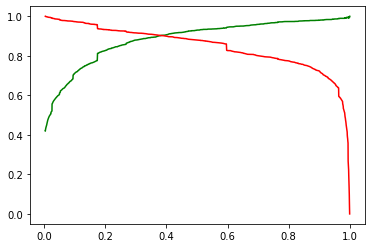

In [7967]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Predictions on the test set

In [7968]:
y_test_pred = result3.predict(X_test_sm)


In [7969]:
y_test_pred[:20]

7681    0.030575
984     0.016853
8135    0.708903
6915    0.003313
2712    0.976442
244     0.002688
4698    0.003815
8287    0.024901
6791    0.991353
8970    0.004742
1001    0.122431
6706    0.020335
1026    0.995541
5167    0.999352
3961    0.173327
5391    0.984658
3996    0.309556
3657    0.784743
8650    0.984632
4683    0.986999
dtype: float64

In [7970]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [7971]:
y_pred_1.head()

,0
7681,0.030575
984,0.016853
8135,0.708903
6915,0.003313
2712,0.976442


In [7972]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
7681,0.0
984,0.0
8135,0.0
6915,0.0
2712,1.0


In [7973]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [7974]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [7975]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [7976]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0.0,7681,0.030575
1,0.0,984,0.016853
2,0.0,8135,0.708903
3,0.0,6915,0.003313
4,1.0,2712,0.976442


In [7977]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Predicted_Prob'})

In [7978]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Predicted_Prob
0,0.0,7681,0.030575
1,0.0,984,0.016853
2,0.0,8135,0.708903
3,0.0,6915,0.003313
4,1.0,2712,0.976442


In [7979]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Predicted_Prob']]

# lead Score assignment to leads
y_pred_final['Lead_Score'] = y_pred_final.Converted_Predicted_Prob.map( lambda x: round(x*100))

In [7980]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Predicted_Prob,Lead_Score
0,7681,0.0,0.030575,3
1,984,0.0,0.016853,2
2,8135,0.0,0.708903,71
3,6915,0.0,0.003313,0
4,2712,1.0,0.976442,98


In [7981]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Predicted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Predicted_Prob,Lead_Score,final_predicted
0,7681,0.0,0.030575,3,0
1,984,0.0,0.016853,2,0
2,8135,0.0,0.708903,71,1
3,6915,0.0,0.003313,0,0
4,2712,1.0,0.976442,98,1


In [7982]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9251675353685778

__Model Performance on Test data__

In [7983]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1558,  118],
       [  83,  927]], dtype=int64)

In [7984]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [7985]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9251675353685778

In [7986]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9178217821782179

In [7987]:
# Let us calculate specificity
TN / float(TN+FP)

0.9295942720763724

In [7988]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.07040572792362769


In [7989]:
# positive predictive value 
print (TP / float(TP+FP))

0.8870813397129187


In [7990]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9494210847044485


In [7991]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8870813397129187

In [7992]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted) # Recall TP/TP + FN

0.9178217821782179

# Inferences

Our model 3, seems to a good model having all significant variables.

The model evaluation metrics also indicating the same. Please see below the statistics on train data and test data.

The ROC curve has a value of 0.97, which is very near to 1 and the curve also towards left and going upwards.


Train Data Statisctics:
    1. Accuracy : 92.02
    2. Sensitivity : 91.57
    3. Specificity : 92.29
        

Test Data Statisctics:
    1. Accuracy : 92.51
    2. Sensitivity : 91.78
    3. Specificity : 92.95
        

__Other metrics of the model on train and test data 
False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall__

Train Data Statisctics:
    1. False Positive Rate : 4.07
    2. Positive Predictive Value : 92.99
    3. negative Predictive Value : 92.82
    4. Precision : 87.95
    5. Recall :  91.57
    

Test Data Statisctics:
    1. False Positive Rate : 7.04
    2. Positive Predictive Value : 88.70
    3. negative Predictive Value : 94.94
    4. Precision : 88.70
    5. Recall :  91.78

Depending on the evaluation metrics, the model seems to perform well and 
also optimal cut off point also seems to be appropriate. Lead Score between 0 to 100 has also been assigned to test data for prioritizing the Leads into hot leads.
The model can predict the conversion of lead quite well, which will help team to reach the target set by CEO.